# Model Training Notebook

In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('../notebooks'))))

from utils.utils import setup_mlflow, get_device
from utils.data_loader import load_data
from models.classification.resnet_classification import Resnet18_Classification
from evaluation.classification.eval_classification import plot_confusion_matrix, plot_misclassified_images, get_all_preds
from scripts.train_classification import train_classification
import torch
import torchvision.models as models
import mlflow
from sklearn.metrics import classification_report




In [ ]:
## Utils:
device = get_device()

Classification Training
----------


Using GPU: NVIDIA GeForce RTX 4090
Epoch: 1, Mini-Batches: 50, Loss: 0.492, Accuracy: 81.440%
Epoch: 2, Mini-Batches: 50, Loss: 0.319, Accuracy: 84.765%
Epoch: 3, Mini-Batches: 50, Loss: 0.274, Accuracy: 86.150%
Epoch: 4, Mini-Batches: 50, Loss: 0.246, Accuracy: 85.873%
Epoch: 5, Mini-Batches: 50, Loss: 0.222, Accuracy: 85.596%


2025/01/27 15:12:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


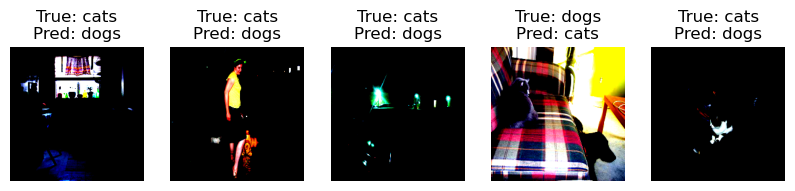

              precision    recall  f1-score   support

        cats       0.89      0.79      0.84       184
        dogs       0.80      0.90      0.85       177

    accuracy                           0.84       361
   macro avg       0.85      0.84      0.84       361
weighted avg       0.85      0.84      0.84       361

              precision    recall  f1-score   support

        cats       0.89      0.79      0.84       184
        dogs       0.80      0.90      0.85       177

    accuracy                           0.84       361
   macro avg       0.85      0.84      0.84       361
weighted avg       0.85      0.84      0.84       361

🏃 View run luxuriant-fawn-346 at: http://localhost:5000/#/experiments/1/runs/0289677f83bd47b0b8665373bffe260b
🧪 View experiment at: http://localhost:5000/#/experiments/1


In [4]:
data_dir = '../data/coco'
setup_mlflow("classification", "http://localhost:5000") 
os.makedirs("../evaluation/classification", exist_ok=True)


with mlflow.start_run():
    mlflow.log_param("epochs", 50)
    mlflow.log_param("batch_size", 128)
    mlflow.log_param("learning_rate", 0.003)
    mlflow.log_param("momentum", 0.9)
    
    net = Resnet18_Classification().to(device)
    trainloader, testloader, class_names = load_data(data_dir, batch_size=128, shuffle=True, resize_x=224, resize_y=224)
    trained_net = train_classification(net, trainloader, testloader, device, num_epochs=5)

    save_path = '../models_saved/classification.pth'
    torch.save(trained_net.state_dict(), save_path)
    mlflow.pytorch.log_model(trained_net, "model")
    mlflow.log_artifact(save_path)


    plot_confusion_matrix(trained_net, testloader, class_names, device, save_path="../evaluation/classification/confusion_matrix.png")
    y_pred, y_true, misclassified_images, misclassified_labels, misclassified_preds = get_all_preds(trained_net, testloader, device)
    plot_misclassified_images(misclassified_images, misclassified_labels, misclassified_preds, class_names, num_images=5)
    
    class_report = classification_report(y_true, y_pred, target_names=class_names)
    print(class_report)
    
    class_report = classification_report(y_true, y_pred, target_names=class_names)
    print(class_report)
    
    report_path = "../evaluation/classification/classification_report.txt"
    with open(report_path, "w") as f:
        f.write(class_report)
    mlflow.log_artifact(report_path)

    
    


    
    

Detection Training
----------


In [ ]:
data_dir = '../data/coco'
setup_mlflow("detection", "http://localhost:5000") 
os.makedirs("../evaluation/detection", exist_ok=True)


with mlflow.start_run():
    mlflow.log_param("epochs", 50)
    mlflow.log_param("batch_size", 128)
    mlflow.log_param("learning_rate", 0.003)
    mlflow.log_param("momentum", 0.9)
    
    net = Resnet18_Detection().to(device)
    trainloader, testloader, class_names = load_data(data_dir, batch_size=128, shuffle=True, resize_x=224, resize_y=224)
    trained_net = train_classification(net, trainloader, testloader, device, num_epochs=5)

    save_path = '../models_saved/detection.pth'
    torch.save(trained_net.state_dict(), save_path)
    mlflow.pytorch.log_model(trained_net, "model")
    mlflow.log_artifact(save_path)



Segmentation Training
----------


In [ ]:
mlflow.set_experiment("COCO_ResNet_Segmentation_Training")
with mlflow.start_run(run_name="Segmentation_Model"):
    train_segmentation()  